In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir=".", untar=True)

In [4]:
# pathlib helps in transforming the images into numpy array

In [5]:
import pathlib
data_dir  = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [7]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

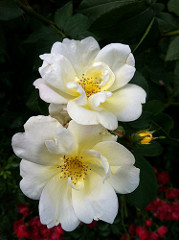

In [8]:
PIL.Image.open(str(roses[0]))

In [9]:
tulips = list(data_dir.glob("tulips/*"))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

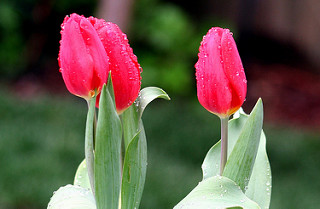

In [10]:
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses':0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
str(flowers_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))

In [17]:
img.shape

(240, 179, 3)

In [ ]:
# as every image is of different size, we have to reshape those images to a common size

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [24]:
len(X_train)

2752

In [25]:
X_train = X_train/255
X_test = X_test/255

In [31]:
# in CNN we create some filters , then each filter is applied thoughout the image 
# and we get a feature map 
# So for n filters we get n feature maps 
# We stack the feature maps in one or more groups 
# so now each group is a image with grid values made by combining the first filters
# we then repeat the process again by creating some differnt filters and applying them
# throught the images we get after stacking up the first feature maps 
# by this we again get some feature maps and the process continues 
# in the last layer we stack all the feature maps we have in the previous last cycle output 
# we then flatten it and apply ANN to get to a result
## after each featuremap stacking we apply activation function and then pooling method two reduce computation
## for example in maxpooling we make a filter of ixi and take the max value of from during each filter
## we also can choose the stride  ,ie.e by how many wqaur the filter will move throughout the 
## feature map.

# for example lets say we are predicting a image of quala 
# we create a filters for eyes , nose , ears , body , tail
# so we have 5 feature maps each indiaction the location of each feature 
# we stack the first 3 in one group (head of quala ) and the next 2 in another group(qualas body)
# we then create filter for head and body and apply them to the first group adn 2nd group image
# we now have two feature map, we stack them to make a single image 
# we then flatten it and apply ANN


# we use padding to use the information in the corner pixels 
# otherwise while applying the filters the corner places are only getiing filtered only once
#  valid convolution uses no paddig , same convolution creates a border of single pixels
# around the original image and apply the filtering.

In [29]:
model = Sequential([
    layers.Conv2D(16, 3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5)
])

model.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10)
    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 375ms/step - accuracy: 0.3005 - loss: 1.6282
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 362ms/step - accuracy: 0.5753 - loss: 1.0650
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.6785 - loss: 0.8741
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.7334 - loss: 0.7299
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 248ms/step - accuracy: 0.8382 - loss: 0.4401
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.9251 - loss: 0.2391
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.9708 - loss: 0.1059
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.9796 - loss: 0.0746
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.9574 - loss: 0.1368
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.9873 - loss: 0.0483


In [32]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6484 - loss: 1.7830


[1.755922555923462, 0.6535947918891907]

In [33]:
# Overfitiing is occuring because CNN by itslef cannot take care of zoomed or rotated images 
# this is why we use data augmentation to make rotated and zoomed images out of our training set

In [55]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip(
        mode="horizontal"
    ),

    
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

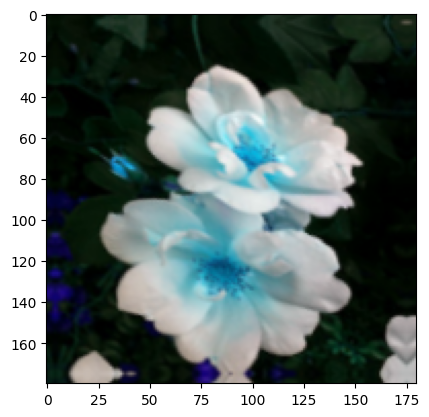

In [56]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

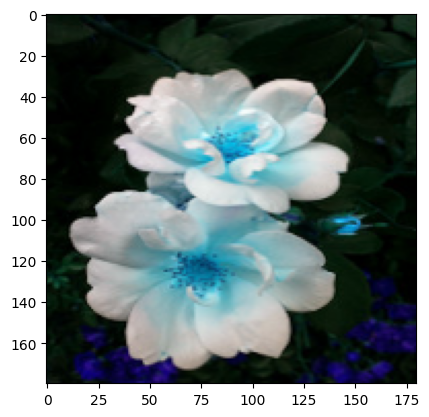

In [53]:

plt.imshow(X[0])

In [57]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=10)    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.3177 - loss: 1.8146
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.4887 - loss: 1.1426
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - accuracy: 0.6051 - loss: 1.0278
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 391ms/step - accuracy: 0.6492 - loss: 0.9356
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 381ms/step - accuracy: 0.6843 - loss: 0.8646
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 416ms/step - accuracy: 0.6793 - loss: 0.8552
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.6911 - loss: 0.8118
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 442ms/step - accuracy: 0.7218 - loss: 0.7597
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 443ms/step - accuracy: 0.7490 - loss: 0.6886
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 447ms/step - accuracy: 0.7466 - loss: 0.6590


In [59]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6716 - loss: 0.8339


[0.8534197211265564, 0.6753812432289124]